In [385]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2
from skimage.io import imread_collection, imshow
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import glob
from skimage import color
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from matplotlib import cm
import matplotlib as mpl
from PIL import Image
import requests
sns.set()
plt.rcParams["axes.grid"] = False

In [3]:
paintings = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/testA/*.jpg')

In [4]:
len(paintings)

122

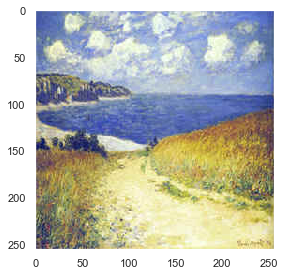

In [5]:
imshow(paintings[0])

In [7]:
generated = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [9]:
len(generated)

751

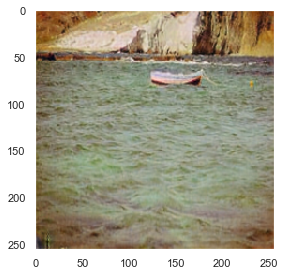

In [10]:
imshow(generated[0])

In [114]:
paint = paintings[0:100]
gen = generated[0:100]

In [154]:
#change this
def color_quantization(original, n_colors=256):
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    return less_colors, centers, labels, kmeans.predict(arr), kmeans, arr

temp = paint[0]

temp.reshape((-1, 3)).shape

_,cen,lab,kmeans_temp, kmeans, arr = color_quantization(temp)

lab

kmeans_temp

arr.shape

# Loss using Kmeans and KNN classifier

In [166]:
## axis should be 0 not -1 and fir at the end then predict 
mp_pallete = []
cluster_pred = []
cen = []
mp = []
cl = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans, arr = color_quantization(i, 256)
    mp.extend(arr.astype(np.int))
    cl.extend(clusters.astype(np.int))
    cen.extend(centers.astype(np.int))

100%|██████████| 100/100 [42:58<00:00, 25.78s/it]


In [167]:
len(mp)

6553600

In [168]:
type(cen)

list

In [169]:
len(cen)

25600

In [170]:
len(np.unique(cen, axis=0))

25403

In [171]:
cen = [tuple(i) for i in cen]

In [214]:
random = range(0,len(np.unique(cen, axis=0)))

In [215]:
random

range(0, 25403)

In [263]:
my_dict = {k: v for k, v in zip(cen, random)}

In [264]:
len(my_dict)

25211

In [265]:
my_dict

{(137, 156, 199): 0,
 (138, 145, 99): 1,
 (245, 241, 196): 2,
 (76, 95, 168): 3,
 (218, 209, 134): 4,
 (197, 209, 197): 20941,
 (108, 83, 68): 6,
 (184, 175, 87): 7,
 (99, 121, 180): 8,
 (160, 152, 65): 9,
 (80, 85, 116): 10,
 (181, 195, 220): 11,
 (164, 179, 200): 12,
 (226, 237, 229): 13,
 (125, 133, 147): 14,
 (244, 233, 161): 15,
 (146, 131, 72): 16,
 (208, 202, 84): 17,
 (158, 159, 150): 18,
 (182, 183, 105): 19,
 (119, 141, 196): 20,
 (35, 39, 83): 21,
 (81, 99, 143): 22,
 (127, 97, 92): 23,
 (192, 185, 153): 24,
 (201, 175, 66): 25,
 (233, 220, 149): 26,
 (104, 100, 97): 27,
 (107, 110, 127): 28,
 (202, 214, 211): 29,
 (160, 177, 224): 30,
 (90, 112, 168): 31,
 (50, 67, 139): 32,
 (235, 229, 180): 33,
 (88, 65, 86): 34,
 (143, 156, 166): 35,
 (140, 109, 75): 36,
 (115, 137, 174): 37,
 (149, 163, 192): 38,
 (218, 230, 237): 39,
 (153, 161, 94): 40,
 (173, 162, 90): 41,
 (239, 248, 218): 42,
 (174, 188, 216): 43,
 (180, 190, 182): 44,
 (119, 112, 96): 13837,
 (160, 132, 64): 46,
 

In [266]:
len(my_dict)

25211

In [267]:
X = pd.DataFrame(my_dict.keys(), columns=list('RGB'))
Y = pd.DataFrame(my_dict.values(), columns=["Labels"])

In [268]:
X.shape

(25211, 3)

In [269]:
len(Y.values.ravel())

25211

In [270]:
knn = KNeighborsClassifier(n_neighbors=1) 

In [271]:
knn.fit(X,Y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [272]:
original_paint = []
for i in paint:
    original_paint.extend(i.reshape((-1, 3)))

In [273]:
len(original_paint)

6553600

In [284]:
original_paint = [tuple(i) for i in original_paint]
len(original_paint)

6553600

In [285]:
painting_pallete = knn.predict(original_paint)

In [275]:
pal = []
for i in gen:
    pal.extend(i.reshape((-1, 3)))

In [276]:
pal = [tuple(i) for i in pal]
len(pal)

6553600

In [277]:
generated_pallete = knn.predict(pal)

In [278]:
len(generated_pallete)

6553600

<ipython-input-286-7e86e18b21bd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


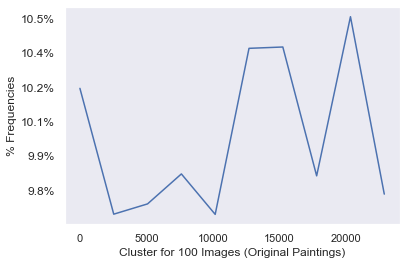

In [286]:
quantized_imX, binEdges_1 = np.histogram(painting_pallete)
#original paintings
fig, ax = plt.subplots()
total = sum(quantizedImX)
ax.plot(binEdges_1[:-1], quantized_imX)
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.xlabel('Cluster for 100 Images (Original Paintings)')
plt.ylabel('% Frequencies')
plt.draw()

<ipython-input-287-7e57e7616eee>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


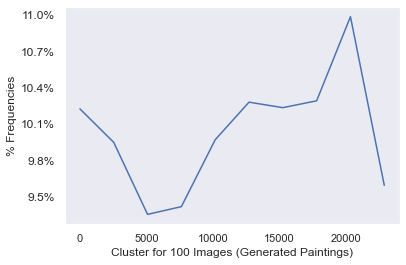

In [287]:
quantized_imY, binEdges_2 = np.histogram(generated_pallete)
#original paintings
fig, ax = plt.subplots()
ax.plot(binEdges_2[:-1], quantized_imY)
yvals = ax.get_yticks()
total = sum(quantizedImY)
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.xlabel('Cluster for 100 Images (Generated Paintings)')
plt.ylabel('% Frequencies')
plt.draw()

<Figure size 1440x1440 with 0 Axes>

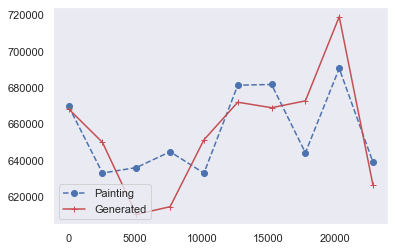

In [288]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges_2[:-1], quantized_imY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=3)
plt.draw()

<ipython-input-289-0f5d1a1d29bd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


<Figure size 1440x1440 with 0 Axes>

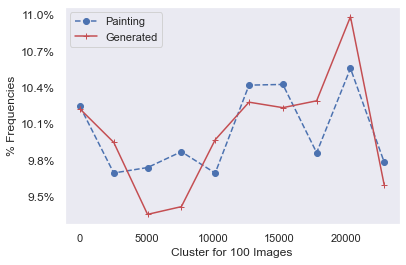

In [289]:
from matplotlib.ticker import FuncFormatter
quantizedImX, binEdges1 = np.histogram(painting_pallete)
quantizedImY, binEdges2 = np.histogram(generated_pallete)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
total = sum(quantizedImY)
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('% Frequencies')
plt.draw()

In [ ]:
#https://www.researchgate.net/post/Does_anyone_know_any_clustering_algorithm_that_use_predefined_centroids
#K = 1 Comment 2

# Final Pallete 

In [293]:
#Final Pallete
X.shape

(25211, 3)

In [298]:
len(original_paint)

6553600

In [299]:
X

R    G    B
0      137  156  199
1      138  145   99
2      245  241  196
3       76   95  168
4      218  209  134
...    ...  ...  ...
25206  148  147  119
25207  144  111   89
25208  145  115   14
25209  157  143  132
25210   42   84  150

[25211 rows x 3 columns]

# Reduce the Palette

In [301]:
## https://blogs.lt.vt.edu/summeraugust/sample-page/claude-monet-color-techniques-and-influences/
## Used 9 colors 
mp_pallete = []
cluster_pred = []
cen = []
mp = []
cl = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans, arr = color_quantization(i, 9)
    mp.extend(arr.astype(np.int))
    cl.extend(clusters.astype(np.int))
    cen.extend(centers.astype(np.int))

100%|██████████| 100/100 [01:56<00:00,  1.16s/it]


In [302]:
len(cen)

900

In [310]:
len(np.unique(cen, axis =-1))

900

In [324]:
import operator
list1 = sorted(cen, key=operator.itemgetter(0,1,2))

In [327]:
list1

[array([ 7, 24, 55]),
 array([ 8, 39, 20]),
 array([13, 18, 14]),
 array([14, 16,  4]),
 array([14, 38, 51]),
 array([17, 33, 39]),
 array([18, 38, 39]),
 array([ 18,  78, 110]),
 array([19, 17, 53]),
 array([19, 20, 23]),
 array([19, 27, 44]),
 array([19, 30, 42]),
 array([20,  7,  5]),
 array([20, 30, 34]),
 array([21, 35, 70]),
 array([21, 37, 49]),
 array([22, 13, 17]),
 array([23, 20, 30]),
 array([23, 23, 19]),
 array([23, 23, 33]),
 array([25, 12, 19]),
 array([25, 43, 20]),
 array([26, 23, 25]),
 array([26, 34, 49]),
 array([27, 20, 13]),
 array([27, 36, 29]),
 array([28, 23, 18]),
 array([28, 42, 41]),
 array([28, 51, 46]),
 array([29, 23, 19]),
 array([29, 31, 19]),
 array([29, 51, 56]),
 array([30, 21, 11]),
 array([30, 23, 25]),
 array([30, 23, 31]),
 array([30, 25, 26]),
 array([30, 44, 58]),
 array([32, 18, 16]),
 array([32, 40, 48]),
 array([33, 42, 73]),
 array([33, 55, 75]),
 array([35, 36, 18]),
 array([35, 79, 63]),
 array([35, 83, 85]),
 array([36, 24, 12]),
 array(

In [516]:
path = '/Users/arpit/Desktop/GAN/Paintings100/*.jpg'
filenames = [img for img in glob.glob(path)]
filenames.sort()

In [524]:
path_1 = '/Users/arpit/Desktop/GAN/GeneratedPaintiings100/*.png'
filenames_1 = [img for img in glob.glob(path_1)]
filenames_1.sort()

In [525]:
mp_palette = []
for name in filenames:
    img = cv2.imread(name,cv2.IMREAD_UNCHANGED)
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)

    print('Dominant color is: ({})'.format(centers[0].astype(np.int32)))
    mp_palette.append(centers[0].astype(np.int32))

Dominant color is: ([ 99 123 129])
Dominant color is: ([ 70 100 117])
Dominant color is: ([100 126 126])
Dominant color is: ([67 91 92])
Dominant color is: ([126 145 137])
Dominant color is: ([ 82 127 110])
Dominant color is: ([ 65  92 106])
Dominant color is: ([118 129 153])
Dominant color is: ([133 135 116])
Dominant color is: ([ 48  99 122])
Dominant color is: ([114 128 137])
Dominant color is: ([130 127 128])
Dominant color is: ([138 133 147])
Dominant color is: ([117 103 104])
Dominant color is: ([135 148 150])
Dominant color is: ([138 160 156])
Dominant color is: ([ 71 110 109])
Dominant color is: ([49 78 97])
Dominant color is: ([ 76  91 100])
Dominant color is: ([88 96 93])
Dominant color is: ([125 117 109])
Dominant color is: ([136 141 116])
Dominant color is: ([122 108  82])
Dominant color is: ([195 203 198])
Dominant color is: ([ 82 109 119])
Dominant color is: ([156 177 181])
Dominant color is: ([115 134 140])
Dominant color is: ([160 180 162])
Dominant color is: ([149 145 

In [526]:
gen_palette = []
for name in filenames_1:
    img = cv2.imread(name,cv2.IMREAD_UNCHANGED)
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)

    print('Dominant color is: ({})'.format(centers[0].astype(np.int32)))
    gen_palette.append(centers[0].astype(np.int32))

Dominant color is: ([148 138 122])
Dominant color is: ([ 97 154 162])
Dominant color is: ([100 104 142])
Dominant color is: ([113  93  84])
Dominant color is: ([ 74 129 150])
Dominant color is: ([107  98  98])
Dominant color is: ([142 148 138])
Dominant color is: ([ 90 116 101])
Dominant color is: ([143 160 134])
Dominant color is: ([123 131 127])
Dominant color is: ([132 144 134])
Dominant color is: ([113 129 139])
Dominant color is: ([159 156 157])
Dominant color is: ([136 141 149])
Dominant color is: ([111 107 104])
Dominant color is: ([101 114 108])
Dominant color is: ([80 93 77])
Dominant color is: ([163 157 156])
Dominant color is: ([122 124 117])
Dominant color is: ([140 141 126])
Dominant color is: ([114 120 111])
Dominant color is: ([105 113 119])
Dominant color is: ([148 169 168])
Dominant color is: ([123 128 128])
Dominant color is: ([143 145 135])
Dominant color is: ([159 171 154])
Dominant color is: ([148 165 167])
Dominant color is: ([108 102  99])
Dominant color is: ([ 9

In [527]:
len(mp_palette)

100

In [528]:
len(np.unique(mp_palette, axis =0))

100

In [529]:
mp_palette = [tuple(i) for i in mp_palette]

In [530]:
mp_palette

[(99, 123, 129),
 (70, 100, 117),
 (100, 126, 126),
 (67, 91, 92),
 (126, 145, 137),
 (82, 127, 110),
 (65, 92, 106),
 (118, 129, 153),
 (133, 135, 116),
 (48, 99, 122),
 (114, 128, 137),
 (130, 127, 128),
 (138, 133, 147),
 (117, 103, 104),
 (135, 148, 150),
 (138, 160, 156),
 (71, 110, 109),
 (49, 78, 97),
 (76, 91, 100),
 (88, 96, 93),
 (125, 117, 109),
 (136, 141, 116),
 (122, 108, 82),
 (195, 203, 198),
 (82, 109, 119),
 (156, 177, 181),
 (115, 134, 140),
 (160, 180, 162),
 (149, 145, 136),
 (172, 163, 141),
 (139, 132, 111),
 (120, 145, 146),
 (131, 137, 143),
 (87, 115, 126),
 (142, 168, 183),
 (186, 178, 195),
 (125, 143, 171),
 (89, 122, 131),
 (122, 150, 161),
 (142, 149, 152),
 (126, 148, 164),
 (89, 99, 92),
 (171, 168, 174),
 (101, 109, 121),
 (119, 101, 99),
 (120, 112, 112),
 (81, 117, 110),
 (103, 108, 105),
 (132, 132, 138),
 (178, 182, 176),
 (148, 143, 127),
 (148, 145, 143),
 (99, 136, 150),
 (134, 140, 148),
 (136, 136, 139),
 (140, 142, 144),
 (140, 145, 143),
 (1

In [531]:
len(gen_palette)

100

In [532]:
gen_palette = [tuple(i) for i in gen_palette]

In [533]:
len(np.unique(gen_palette, axis =0))

99

AttributeError: 'JpegImageFile' object has no attribute 'get_array'

<Figure size 1440x1440 with 0 Axes>

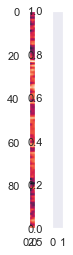

In [560]:
from matplotlib.ticker import FuncFormatter
quantizedImX, binEdges1 = np.histogram(mp_palette)
quantizedImY, binEdges2 = np.histogram(gen_palette)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
#total = sum(quantizedImY)
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
#yvals = ax.get_yticks()
#ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
#img = ax.imshow(mp_palette)
#cb = plt.colorbar(im,ax=ax)
cb.set_label('counts in bin')
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('% Frequencies')
plt.draw()

In [576]:
mp_palette

[(99, 123, 129),
 (70, 100, 117),
 (100, 126, 126),
 (67, 91, 92),
 (126, 145, 137),
 (82, 127, 110),
 (65, 92, 106),
 (118, 129, 153),
 (133, 135, 116),
 (48, 99, 122),
 (114, 128, 137),
 (130, 127, 128),
 (138, 133, 147),
 (117, 103, 104),
 (135, 148, 150),
 (138, 160, 156),
 (71, 110, 109),
 (49, 78, 97),
 (76, 91, 100),
 (88, 96, 93),
 (125, 117, 109),
 (136, 141, 116),
 (122, 108, 82),
 (195, 203, 198),
 (82, 109, 119),
 (156, 177, 181),
 (115, 134, 140),
 (160, 180, 162),
 (149, 145, 136),
 (172, 163, 141),
 (139, 132, 111),
 (120, 145, 146),
 (131, 137, 143),
 (87, 115, 126),
 (142, 168, 183),
 (186, 178, 195),
 (125, 143, 171),
 (89, 122, 131),
 (122, 150, 161),
 (142, 149, 152),
 (126, 148, 164),
 (89, 99, 92),
 (171, 168, 174),
 (101, 109, 121),
 (119, 101, 99),
 (120, 112, 112),
 (81, 117, 110),
 (103, 108, 105),
 (132, 132, 138),
 (178, 182, 176),
 (148, 143, 127),
 (148, 145, 143),
 (99, 136, 150),
 (134, 140, 148),
 (136, 136, 139),
 (140, 142, 144),
 (140, 145, 143),
 (1

<ipython-input-666-f6b2e9a4344a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


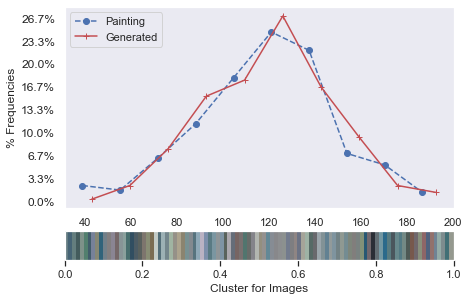

In [666]:
from matplotlib.ticker import FuncFormatter
quantizedImX, binEdges1 = np.histogram(mp_palette)
quantizedImY, binEdges2 = np.histogram(gen_palette)
fig = plt.figure()
ax = fig.add_axes([0.05, 0.2, 0.9, 0.7])
ax1 = fig.add_axes([0.05, 0.02, 0.9, 0.1])
total = sum(quantizedImX)
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, orientation='horizontal')



ax.legend(loc=2)
plt.xlabel('Cluster for Images')
ax.set_ylabel('% Frequencies')
plt.draw()

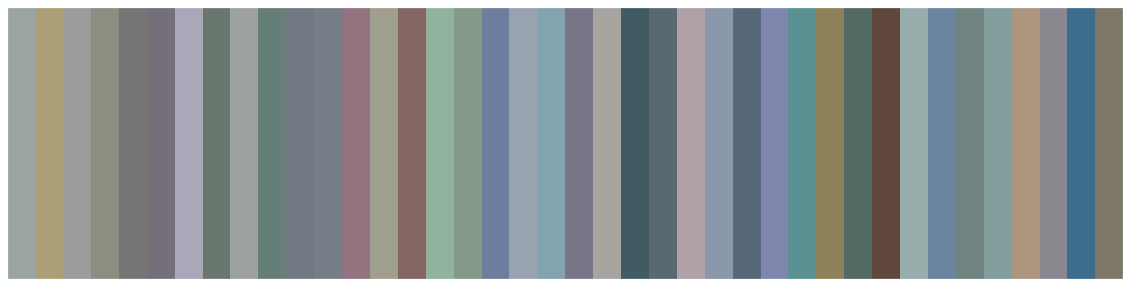

In [522]:
barColors = (np.array(mp_palette)).astype(np.uint8)

title = "Palette"
#creating bar image
cols = len(barColors)
rows = max([1,int(cols/2.5)])

# Create color Array
barFullData = np.tile(barColors, (rows,1)).reshape(rows, cols, 3)
# Create Image from Array
barImg = Image.fromarray(barFullData, 'RGB')
#saving image
barImg.save("{}_{}.png".format(title,"Monet"))
fig, ax = plt.subplots(figsize=(20, 5))
ax.axis(xmin=0, xmax=len(barFullData))
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for index, colour in enumerate(scaled_colours):
    ax.axvspan(index, index + 1, color=colour)
    ax.patch.set_visible(False)

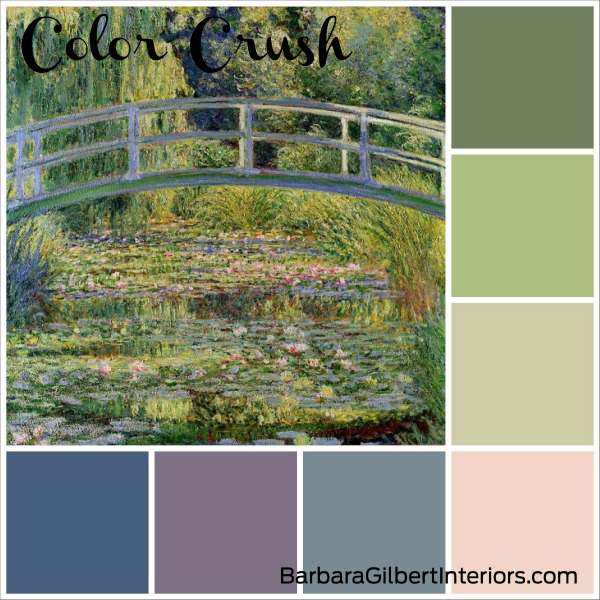

In [393]:
url = 'https://www.interiordesigndallas.com/wp-content/uploads/2018/06/Color-Crush-Water-Lilies-3.jpg'
Image.open(requests.get(url, stream=True).raw)

In [424]:
#Final Palette 
len(barFullData)

48

In [428]:
barFullData

array([[[154, 165, 163],
        [172, 158, 119],
        [155, 157, 156],
        ...,
        [124, 125, 121],
        [176, 185, 183],
        [221, 224, 228]],

       [[154, 165, 163],
        [172, 158, 119],
        [155, 157, 156],
        ...,
        [124, 125, 121],
        [176, 185, 183],
        [221, 224, 228]],

       [[154, 165, 163],
        [172, 158, 119],
        [155, 157, 156],
        ...,
        [124, 125, 121],
        [176, 185, 183],
        [221, 224, 228]],

       ...,

       [[154, 165, 163],
        [172, 158, 119],
        [155, 157, 156],
        ...,
        [124, 125, 121],
        [176, 185, 183],
        [221, 224, 228]],

       [[154, 165, 163],
        [172, 158, 119],
        [155, 157, 156],
        ...,
        [124, 125, 121],
        [176, 185, 183],
        [221, 224, 228]],

       [[154, 165, 163],
        [172, 158, 119],
        [155, 157, 156],
        ...,
        [124, 125, 121],
        [176, 185, 183],
        [221, 224, 228]]

# Another Palette

In [359]:
path_1 = '/Users/arpit/Desktop/GAN/monet2photo/trainA/*.jpg'
filenames = [img for img in glob.glob(path_1)]
filenames.sort()

In [372]:
mp_palette1 = []
lab = []
for name in filenames:
    img = cv2.imread(name,cv2.IMREAD_UNCHANGED)
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)

    #print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))
    mp_palette1.append(centers[0].astype(np.int32))
    lab.append(labels)

In [369]:
mp_palette1.extend(mp_palette)

In [370]:
len(mp_palette1)

1194

In [371]:
len(np.unique(mp_palette1, axis = 0))

1193

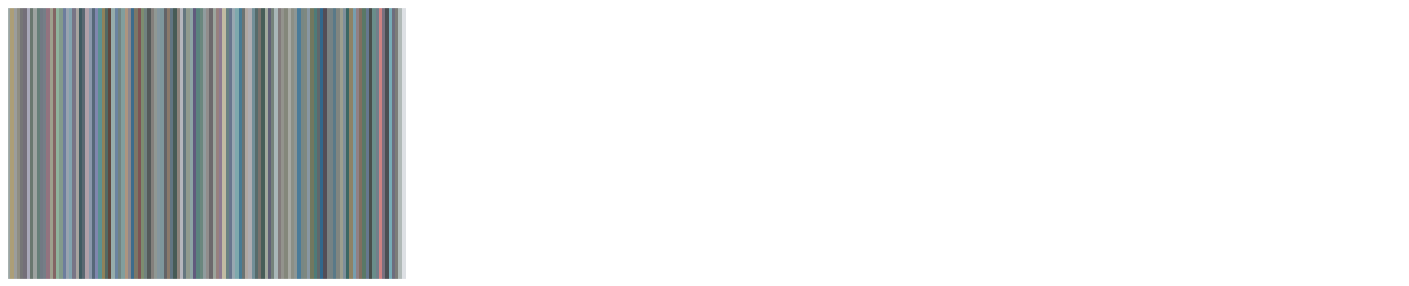

In [421]:
barColors = (np.array(mp_palette1)).astype(np.uint8)

title = "p"
#creating bar image
cols = len(barColors)
rows = max([1,int(cols/2.5)])

# Create color Array
barFullData = np.tile(barColors, (rows,1)).reshape(rows, cols, 3)
# Create Image from Array
barImg = Image.fromarray(barFullData, 'RGB')
#saving image
barImg.save("{}_{}.png".format(title,"method"))
fig, ax = plt.subplots(figsize=(25, 5))
ax.axis(xmin=0, xmax=len(barFullData))
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for index, colour in enumerate(scaled_colours):
    ax.axvspan(index, index + 1, color=colour)
    ax.patch.set_visible(False)

## Plot histogram of images based on the paleete 1 colors  (48 colors)

In [435]:
len(np.unique(barFullData[3], axis=0))

122

In [436]:
barFullData[0]

array([[154, 165, 163],
       [172, 158, 119],
       [155, 157, 156],
       [142, 141, 130],
       [118, 118, 119],
       [116, 111, 121],
       [169, 168, 185],
       [106, 119, 111],
       [157, 162, 160],
       [102, 126, 120],
       [113, 122, 132],
       [117, 126, 135],
       [147, 115, 127],
       [158, 160, 141],
       [131, 101, 100],
       [144, 179, 157],
       [131, 154, 139],
       [109, 125, 157],
       [152, 163, 175],
       [130, 163, 175],
       [120, 117, 134],
       [168, 164, 160],
       [ 64,  91,  97],
       [ 90, 104, 114],
       [176, 160, 168],
       [138, 152, 171],
       [ 86, 104, 121],
       [127, 134, 174],
       [ 91, 145, 147],
       [143, 130,  91],
       [ 83, 105, 100],
       [ 96,  71,  62],
       [150, 173, 171],
       [107, 132, 160],
       [113, 131, 129],
       [129, 158, 157],
       [173, 148, 127],
       [139, 135, 142],
       [ 61, 108, 140],
       [124, 119, 103],
       [125,  84,  85],
       [125, 141

In [438]:
len(barFullDat)

122

In [439]:
colors = np.unique(barFullData[3], axis=0)

In [444]:
colors[0]

array([ 49, 103, 140], dtype=uint8)

In [452]:
colors = [tuple(i) for i in colors]

In [453]:
colors

[(49, 103, 140),
 (60, 103, 100),
 (61, 108, 140),
 (64, 91, 97),
 (71, 91, 86),
 (71, 93, 88),
 (72, 78, 74),
 (72, 123, 148),
 (74, 79, 83),
 (74, 123, 153),
 (78, 123, 121),
 (83, 77, 87),
 (83, 105, 100),
 (84, 90, 89),
 (86, 104, 121),
 (86, 107, 107),
 (89, 121, 136),
 (90, 104, 114),
 (90, 120, 102),
 (90, 131, 126),
 (91, 145, 147),
 (96, 71, 62),
 (96, 91, 125),
 (96, 96, 118),
 (96, 103, 107),
 (97, 117, 130),
 (98, 100, 104),
 (100, 118, 127),
 (102, 120, 143),
 (102, 126, 120),
 (104, 118, 142),
 (105, 130, 130),
 (106, 119, 111),
 (106, 141, 138),
 (107, 115, 114),
 (107, 132, 160),
 (107, 135, 126),
 (108, 105, 108),
 (109, 125, 157),
 (110, 109, 125),
 (113, 122, 132),
 (113, 127, 138),
 (113, 130, 127),
 (113, 131, 129),
 (114, 120, 95),
 (114, 143, 152),
 (116, 111, 121),
 (117, 126, 135),
 (117, 130, 122),
 (117, 130, 132),
 (118, 118, 119),
 (118, 171, 182),
 (119, 158, 175),
 (120, 113, 108),
 (120, 117, 134),
 (120, 135, 132),
 (121, 113, 127),
 (123, 129, 129),
 (

In [471]:
a=[[float(i)/255 for i in d] for d in colors]
a

[[0.19215686274509805, 0.403921568627451, 0.5490196078431373],
 [0.23529411764705882, 0.403921568627451, 0.39215686274509803],
 [0.23921568627450981, 0.4235294117647059, 0.5490196078431373],
 [0.25098039215686274, 0.3568627450980392, 0.3803921568627451],
 [0.2784313725490196, 0.3568627450980392, 0.33725490196078434],
 [0.2784313725490196, 0.36470588235294116, 0.34509803921568627],
 [0.2823529411764706, 0.3058823529411765, 0.2901960784313726],
 [0.2823529411764706, 0.4823529411764706, 0.5803921568627451],
 [0.2901960784313726, 0.30980392156862746, 0.3254901960784314],
 [0.2901960784313726, 0.4823529411764706, 0.6],
 [0.3058823529411765, 0.4823529411764706, 0.4745098039215686],
 [0.3254901960784314, 0.30196078431372547, 0.3411764705882353],
 [0.3254901960784314, 0.4117647058823529, 0.39215686274509803],
 [0.32941176470588235, 0.35294117647058826, 0.34901960784313724],
 [0.33725490196078434, 0.40784313725490196, 0.4745098039215686],
 [0.33725490196078434, 0.4196078431372549, 0.41960784313

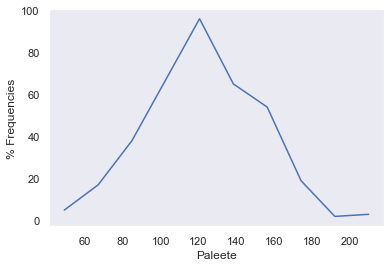

In [474]:
quantized_imX, binEdges_1 = np.histogram(colors)
#original paintings
fig, ax = plt.subplots()
total = sum(quantizedImX)
ax.plot(binEdges_1[:-1], quantized_imX)
yvals = ax.get_yticks()
plt.xlabel('Paleete')
plt.ylabel('% Frequencies')
plt.draw()

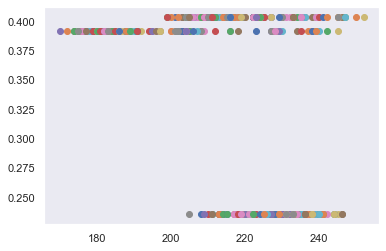

In [489]:
# Wrong Method 
fig, ax = plt.subplots()
for xy, color in zip(img, a):
    ax.plot(xy[0],a[1],'o', picker=True)
plt.show()